<a id='top'></a>

# Data Cleaning and Exploratory Data Analysis 
***

**Name**: Noorain Baig

***


**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>


### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 


- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**(1)** The population here is defined as the collection of units, so it would be all polling stations in the states. 

**(2)** The sample frame is defined as a list of all of the items in your population, so the sample frame would be 6 polling stations in Alaska, 3 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California for a total of 102 polling stations. 

**(3)** The sample is the subset of the population that we're gathering data from. In this case, the sample is 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa and 7 polling stations from California. 

**(4)** The type of sample is a stratified sample, because each polling group in the population has been divided by 6 and polled to be proportionate to their prevalence in the population. For example, California has the highest number of polling stations, and the randomly selected 7 polling stations (42/6), the largest in our sample, reflects that. 

**(5)** The quantity of interest is the average number of votes for each candidate per polling station. 

Source used for sample frame definition: https://www.statisticshowto.com/sampling-frame/


**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value. 
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**(1)** The population here is defined as the collection of units, so it would be all polling stations in the states. 

**(2)** The sample frame is defined as a list of all of the items in your population, so the sample frame would be 6 polling stations in Alaska, 3 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California for a total of 102 polling stations.

**(3)** The sample is the subset of the population that we're gathering data from. In this case, the sample is every 3rd value after the stations are sorted alphabetically by state name. 

**(4)** The type of sample is a systematic sample, where the sample frame is ordered alphabetically, and an integer k (in this case, 3) is chosen and then every kth unit in the sample frame is sampled. 

**(5)** The quantity of interest is the average number of votes for each candidate per polling station.

Exta notes: This type of sample is susceptible to name clustering and is not considered truly random.


[Back to top](#top)

<br>


### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [2]:
dfSample = pd.DataFrame({"":[4.2, 5.1, 5.0, 1.5, 3.8, 4.1, 5.5, 1.9]})
print('The mean when y=1.5 is {}'.format(dfSample.mean()))
print('The median when y=1.5 is {}'.format(dfSample.median()))

dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, 6, 3.8, 4.1, 5.5, 1.9]})
print('The mean when y=6 is {}'.format(dfSample2.mean()))
print('The median when y=6 is {}'.format(dfSample2.median()))

The mean when y=1.5 is     3.8875
dtype: float64
The median when y=1.5 is     4.15
dtype: float64
The mean when y=6 is     4.45
dtype: float64
The median when y=6 is     4.6
dtype: float64


**When y is 1.5:**

    Mean: 3.8875

    Median: 4.15

**When y is 6:**

    Mean: 4.45

    Median: 4.6

Having a larger number in the dataset will increase both the mean and median values. The maximum value (y=6) will drive those values up, while the minimum (y=1.5) will be comparatively lower. 

**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

**Part B Part 1:**

(1) 4.2 + 5.1 + 5.0 + 3.8 + 4.1 + 5.5 + 1.9 = 29.6           add all of the numbers excluding y

(2) (29.6 + y) / 8 = 6      set up the equation to calculate the mean, when the mean is 6 

(3) (29.6 + y) = 48         multiply both sides by 8

(4) y = 18.4                subtract 29.6 from both sides to get the value of y

The value of 18.4 would make the mean of the data equal to 6. 


**Part B Part 2:**

There is no way to make the median of the data equal to 6, because the variables in numerical order look like this: 
1.9, 3.8, 4.1, 4.2, 5.0, 5.1, 5.5

A large y value would just get eliminated first, while a middle one wouldn't help the median become higher. Because this is a dataset with an even number of data points (including y), the median will always be the average of the two middle numbers. You can never have a middle number high enough that would make the median 6. 


**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.

In [3]:
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, 6, 3.8, 4.1, 5.5, 1.9]})
print('The sample variance is {}'.format(np.var(dfSample2, ddof=1)))

#square root of the variance
#same units as sample
print('The sample standard deviation is {}'.format(np.std(dfSample2, ddof=1)))

#source used: https://mathbitsnotebook.com/Algebra1/StatisticsData/STSD.html

The sample variance is     1.62
dtype: float64
The sample standard deviation is     1.272792
dtype: float64


The sample variance is for the original dataset is 1.4175.

The sample deviation is for the original dataset is  1.272792.

**Extra Notes:** The sample variance is used to calculate how varied a sample is. It is the average of squared differences from the mean. To calculate it, we'll first calculate the mean of the sample, then subtract the mean from each datapoint and square the results. We'll then add up those results and divide by however many datapoints there were. Variance doesn't contain the same units as the data, while standard deviation does. Standard deviation will show how much variation from the mean there is in the sample, in the same units that the data is in (which is why it's just the square of the sample variance). A low standard deviation means the data points are close to the mean. 

**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [4]:
#when y is 5
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, 5, 3.8, 4.1, 5.5, 1.9]})
print('The median when y=5 is {}'.format(dfSample2.median()))
print()
#when y is 50
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, 50, 3.8, 4.1, 5.5, 1.9]})
print('The median when y=50 is {}'.format(dfSample2.median()))
print()
#when y is 4.36
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, 4.36, 3.8, 4.1, 5.5, 1.9]})
print('The median when y=4.36 is {}'.format(dfSample2.median()))
print()
#when y is headed towards infinity
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, float('inf'), 3.8, 4.1, 5.5, 1.9]})
print('The median when y= infinity is {}'.format(dfSample2.median()))
print()
#when y is headed towards negative infinity
dfSample2 = pd.DataFrame({"":[4.2, 5.1, 5.0, float('-inf'), 3.8, 4.1, 5.5, 1.9]})
print('The median when y= negative infinity is {}'.format(dfSample2.median()))

#Used this as a reference, linked by someone on Piazza: https://www.geeksforgeeks.org/python-infinity/

The median when y=5 is     4.6
dtype: float64

The median when y=50 is     4.6
dtype: float64

The median when y=4.36 is     4.28
dtype: float64

The median when y= infinity is     4.6
dtype: float64

The median when y= negative infinity is     4.15
dtype: float64


- The median when y is equal to 5: 4.6

- The median when y is equal to 50: 4.6

- The median when y is equal to 4.36: 4.28

- The median when y is headed towards infinity: 4.6

- The median when y is headed towards negative infinity: 4.15

**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

- The set of all the possible values that the sample mean could take on would be -infinity to infinity. Since the mean relies on the data values being added up and then divided by the number of data values, having higher numbers will result in a higher mean. In varying y, the range of the mean is -inf to inf since those are the maximum and minimum for y. When y is going towards infinity or negative infinity, the sum of all of the data points is going to be either infinity or negative infinity. Infinity divided by any natural number will be infinity.


- The set of all the possible values that the sample median could take on would be [4.15 to 4.6] because as y varies from infinity to negative infinity, the resulting median is those values. The median would be most affected by values closest to the middle of the dataset. Since the maximum and minimum values for y are infinity and negative infinity, the resulting medians cannot be larger or smaller than [4.15 to 4.6].

**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

- The standard deviation would increase since the values are spread out over a higher range, resulting in a larger amount of variation. The sample standard deviation will increase and head towards infinity as y heads towards infinity due to this larger amount of variation. 


- X is the mean of the whole set. If y is headed towards the mean, then there will be less variance because the values will be closer and closer to the mean, which will lower the variance and the sample standard deviation will get closer to 1. 

[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [5]:
#for dataset A:
dfSetA = pd.DataFrame({"":[0,1,2,3,4,5,6,7,8,9,10,11,12]})
A_mean = dfSetA.mean()
sd_A = np.std(dfSetA, ddof=1)
print('The mean for Dataset A is {}'.format(A_mean))
print('The standard deviation for Dataset A is {}'.format(sd_A))
print()
#for dataset B
dfSetB = pd.DataFrame({"":[0,0,0,12,7,18,47,25,0,13,0,35]})
B_mean = dfSetB.mean()
sd_B = np.std(dfSetB, ddof=1)
print('The mean for Dataset B is {}'.format(B_mean))
print('The standard deviation for Dataset B is {}'.format(sd_B))
print()
#for dataset C
dfSetC = np.random.exponential(scale=43, size=1000)
C_mean = dfSetC.mean()
sd_C = np.std(dfSetC, ddof=1)
print('The mean for Dataset C is {}'.format(C_mean))
print('The standard deviation for Dataset C is {}'.format(sd_C))

The mean for Dataset A is     6.0
dtype: float64
The standard deviation for Dataset A is     3.89444
dtype: float64

The mean for Dataset B is     13.083333
dtype: float64
The standard deviation for Dataset B is     15.640613
dtype: float64

The mean for Dataset C is 42.19657170241957
The standard deviation for Dataset C is 41.77890048921233


**For Dataset A:**
- Mean: 6.0
- Standard Deviation: 3.89444

**For Dataset B:**
- Mean: 13.083333
- Standard Deviation: 15.640613
    
**For Dataset C:**
- Mean: 42.19657170241957
- Standard Deviation: 41.77890048921233

**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [6]:
#for Dataset A
dfNewSetA = dfSetA - A_mean
print('The mean for the new Dataset A is {}'.format(dfNewSetA.mean()))
print('The standard deviation for the new Dataset A is {}'.format(np.std(dfNewSetA, ddof=1)))
print()
#for Dataset B
dfNewSetB = dfSetB - B_mean
print('The mean for the new Dataset B is {}'.format(dfNewSetB.mean()))
print('The standard deviation for the new Dataset B is {}'.format(np.std(dfNewSetB, ddof=1)))
print()
#for Dataset C
dfNewSetC = dfSetC - C_mean
print('The mean for the new Dataset C is {}'.format(dfNewSetC.mean()))
print('The standard deviation for the new Dataset C is {}'.format(np.std(dfNewSetC, ddof=1)))


The mean for the new Dataset A is     0.0
dtype: float64
The standard deviation for the new Dataset A is     3.89444
dtype: float64

The mean for the new Dataset B is    -1.184238e-15
dtype: float64
The standard deviation for the new Dataset B is     15.640613
dtype: float64

The mean for the new Dataset C is -3.922195901395753e-15
The standard deviation for the new Dataset C is 41.77890048921233


**For Dataset A:**
- Mean: 0.0
- Standard Deviation:  3.89444

**For Dataset B:**
- Mean:  -1.184238e-15
- Standard Deviation: 15.640613
    
**For Dataset C:**
- Mean: -3.922195901395753e-15
- Standard Deviation: 41.77890048921233

**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [7]:
#for dataset A
final_dA = dfNewSetA / sd_A
print('The mean for the this Dataset A is {}'.format(final_dA.mean()))
print('The standard deviation for the this Dataset A is {}'.format(np.std(final_dA, ddof=1)))
print()
#for dataset B
final_dB = dfNewSetB / sd_B
print('The mean for the this Dataset B is {}'.format(final_dB.mean()))
print('The standard deviation for the this Dataset B is {}'.format(np.std(final_dB, ddof=1)))
print()
#for dataset C
final_dC = dfNewSetC / sd_C
print('The mean for the this Dataset C is {}'.format(final_dC.mean()))
print('The standard deviation for the this Dataset B is {}'.format(np.std(final_dC, ddof=1)))

The mean for the this Dataset A is    -5.124106e-17
dtype: float64
The standard deviation for the this Dataset A is     1.0
dtype: float64

The mean for the this Dataset B is    -1.850372e-17
dtype: float64
The standard deviation for the this Dataset B is     1.0
dtype: float64

The mean for the this Dataset C is -1.0658141036401502e-16
The standard deviation for the this Dataset B is 0.9999999999999999


**For Dataset A:**
- Mean: -5.124106e-17
- Standard Deviation:  1.0

**For Dataset B:**
- Mean:   -1.850372e-17
- Standard Deviation: 1.0
    
**For Dataset C:**
- Mean: -1.0658141036401502e-16
- Standard Deviation: 0.99 ≈ 1.0

**Part D:** Why might this result matter?

A standard deviation of 1 means that the values in the dataset are very close together. This is a standard normal distribution, which has a mean of 0 and a standard deviation of 1. For a standard normal distribution, 95% of the data points lie within 2 standard deviations of the mean. 

Reference for standard normal distribution: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability9.html

**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

- For Dataset A, this could be representative of asking a collection of students for their grade levels at a school that goes from kindergarden to 12th grade.
- For Dataset B, this could represent how much money people in college spend on lunch every week (which would be 0 if you packed lunch from home and it could also explain why the amounts wouldn't be for someone going out to lunch every single day). 
- Dataset C could represent grade averages for a particularly difficult electrical engineering class that also has a ridiculously large amount of people taking it. Perhaps this could be for a course like Circuits and its course equivalent at many different colleges.  

[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [20]:
dfPrecip = pd.read_csv('BoulderPrecip.csv')
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [21]:
dfPrecip = dfPrecip.replace(to_replace = "Tr", value = 0.0)
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


In [10]:
dfPrecip = dfPrecip.drop([0,120])
dfPrecip.tail()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
115,2015,0.38,3.69,0.38,4.50,7.82,1.76,2.98,0.31,0.14,2.02,1.83,1.11,27.39
116,2016,0.37,1.44,3.84,3.34,2.01,2.37,0.61,1.06,0.45,0.38,0.47,0.91,17.25
117,2017,1.41,0.73,1.45,3.15,6.29,0.45,1.30,1.62,1.92,2.42,0.57,0.68,21.89
118,2018,0.74,1.04,2.23,1.35,4.76,1.82,1.84,0.24,1.02,2.68,1.19,0.34,19.01
119,2019,1.57,0.74,2.83,1.87,3.89,2.12,2.21,0.10,0.56,2.42,2.38,0.35,21.04


In [22]:
#dfPrecip["YEAR TOTAL"] = pd.to_numeric(dfPrecip["YEAR TOTAL"])
#this was painful
#saw someone's Piazza post where they got the same errors, turns out it was because there are different data types 
#in the columns 
#so this is my drawn out and not very efficient solution

dfPrecip["JAN"] = pd.to_numeric(dfPrecip["JAN"])
dfPrecip["FEB"] = pd.to_numeric(dfPrecip["FEB"])
dfPrecip["MAR"] = pd.to_numeric(dfPrecip["MAR"])
dfPrecip["APR"] = pd.to_numeric(dfPrecip["APR"])
dfPrecip["MAY"] = pd.to_numeric(dfPrecip["MAY"])
dfPrecip["JUN"] = pd.to_numeric(dfPrecip["JUN"])
dfPrecip["JUL"] = pd.to_numeric(dfPrecip["JUL"])
dfPrecip["AUG"] = pd.to_numeric(dfPrecip["AUG"])
dfPrecip["SEP"] = pd.to_numeric(dfPrecip["SEP"])
dfPrecip["OCT"] = pd.to_numeric(dfPrecip["OCT"])
dfPrecip["NOV"] = pd.to_numeric(dfPrecip["NOV"])
dfPrecip["DEC"] = pd.to_numeric(dfPrecip["DEC"])
dfPrecip["Year"] = pd.to_numeric(dfPrecip["Year"])
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.00,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

Text(0.5, 1.0, 'Precipitation by Month')

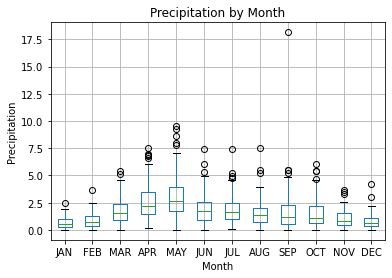

In [12]:
#Your code here
all_year = dfPrecip.boxplot(column=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
all_year.set_ylabel("Precipitation")
all_year.set_xlabel("Month")
all_year.set_title("Precipitation by Month")


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

Text(0.5, 1.0, 'Precipitation by Spring Grouping')

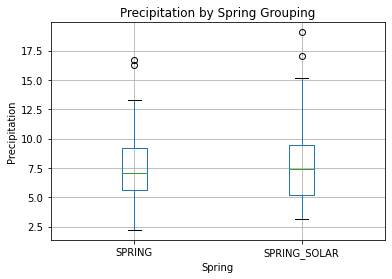

In [23]:
#Your code here
dfPrecip["SPRING"] = dfPrecip["MAR"] + dfPrecip["APR"] + dfPrecip["MAY"]
#dfPrecip.boxplot(column=['SPRING'])
dfPrecip["SPRING_SOLAR"] = dfPrecip["APR"] + dfPrecip["MAY"] + dfPrecip["JUN"]
boxplot = dfPrecip.boxplot(column=['SPRING', 'SPRING_SOLAR'])
boxplot.set_ylabel("Precipitation")
boxplot.set_xlabel("Spring")
boxplot.set_title("Precipitation by Spring Grouping")
#referenced this to create groupings: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [24]:
#for the SPRING (March, April, May) grouping:
print('The mean for the March-May grouping is {}'.format(dfPrecip["SPRING"].mean()))
print('The standard deviation for the March-May grouping is {}'.format(np.std(dfPrecip["SPRING"], ddof=1)))
print()
#for the SPRING_SOLAR (April, May, June) grouping:
print('The mean for the April-June grouping is {}'.format(dfPrecip["SPRING_SOLAR"].mean()))
print('The standard deviation for the April-June grouping is {}'.format(np.std(dfPrecip["SPRING_SOLAR"], ddof=1)))

The mean for the March-May grouping is 7.5258677685950435
The standard deviation for the March-May grouping is 2.7269475210148704

The mean for the April-June grouping is 7.68099173553719
The standard deviation for the April-June grouping is 2.9275944063794874


**For the March-May grouping:**

mean: 7.5258677685950435

standard deviation: 2.7269475210148704

**For the April-June grouping:**

mean: 7.68099173553719

standard deviation: 2.9275944063794874

In [25]:
#five number summaries for March-May grouping:
maximum = dfPrecip["SPRING"].max()
print('The maximum for the March-May grouping is {}'.format(maximum))
minimum = dfPrecip["SPRING"].min()
print('The minimum for the March-May grouping is {}'.format(minimum))
median = dfPrecip["SPRING"].median()
print('The median for the March-May grouping is {}'.format(median))
print("The first quantile of the March-May grouping is: ", np.quantile(dfPrecip["SPRING"], .25))
print("The third quantile of the March-May grouping is: ", np.quantile(dfPrecip["SPRING"], .75))
print()


#five number summaries for the April-June grouping:
maximum = dfPrecip["SPRING_SOLAR"].max()
print('The maximum for the April-June grouping is {}'.format(maximum))
minimum = dfPrecip["SPRING_SOLAR"].min()
print('The minimum for the April-June grouping is {}'.format(minimum))
median = dfPrecip["SPRING_SOLAR"].median()
print('The median for the April-June grouping is {}'.format(median))
print("The first quantile of the April-June grouping is: ", np.quantile(dfPrecip["SPRING_SOLAR"], .25))
print("The third quantile of the April-June grouping is: ", np.quantile(dfPrecip["SPRING_SOLAR"], .75))

#Reference for calculating quantiles: https://www.geeksforgeeks.org/numpy-quantile-in-python/

The maximum for the March-May grouping is 16.75
The minimum for the March-May grouping is 2.21
The median for the March-May grouping is 7.11
The first quantile of the March-May grouping is:  5.6
The third quantile of the March-May grouping is:  9.17

The maximum for the April-June grouping is 19.07
The minimum for the April-June grouping is 3.12
The median for the April-June grouping is 7.38
The first quantile of the April-June grouping is:  5.23
The third quantile of the April-June grouping is:  9.469999999999999


**Here's the March-May group five-number summary:** 

maximum: 16.75

minimum: 2.21

median: 7.11

first quantile:  5.6

third quantile:  9.17

**Here's the April-June group five-number summary:**

maximum: 19.07

minimum: 3.12

median: 7.38

first quantile:  5.23

third quantile:  9.469999999999999

I would favor the April-June grouping over the March-May one because the April-June grouping has a higher mean and higher maximum for precipitation, which we want to use because Spring is the wettest season of the year, and it makes more sense to choose data that correlates with that statement more. 

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

Text(0, 0.5, 'Number of times')

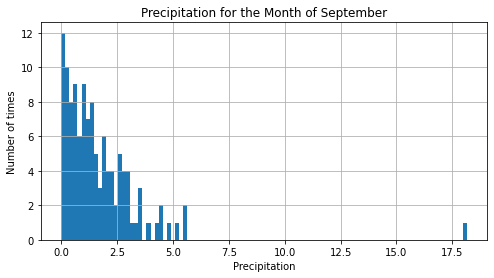

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
sept = dfPrecip.hist(column="SEP", ax=ax, bins=100);
plt.title('Precipitation for the Month of September')
plt.xlabel('Precipitation')
plt.ylabel('Number of times')
#Used this to figure out how to label histograms: https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

This is a density histogram, which means that the values are counted in each bin and the height is adjusted so that the sum of the areas of all of the bins is equal to 1. This histogram is right-skewed (also called positively-skewed), meaning the mode is the highest part of the graph, and the median and the mean fall to the right of that peak. The outlier in this data is the point all the way to the left, which turns out to be data from September 2013, equal to 18.16 (found by calculating the maximum point of the dataset). This is a unimodal distribution, which has one local maximum.  





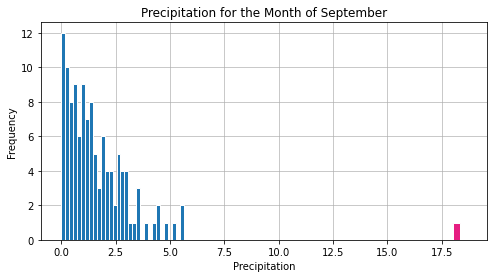

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
mycolor =np.array([230,30,130])/255


dfPrecip.hist(column="SEP", ax=ax, bins=100, edgecolor="white");
dfPrecip.loc[dfPrecip["Year"]== 2013].hist(column="SEP", ax=ax, bins = 3, facecolor=mycolor, edgecolor="white")


#ax.grid(alpha=0.85)
#ax.set_axisbelow(True)
#axes[0]plt.title('Precipitation for the Month of September')
#plt.xlabel('Precipitation')
#plt.ylabel('Number of times')

#dfPrecip.loc[dfPrecip["Year"]== 2013].hist(column="SEP", ax=axes, bins = 3, facecolor=mycolor, edgecolor="white")
plt.title('Precipitation for the Month of September')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')

ax.grid(alpha=0.85)
ax.set_axisbelow(True)

#axes[0].set_xlim([0,20])
#axes[1].set_xlim([0,20])
#axes[0].set_ylim([0,13])
#axes[1].set_ylim([0,13]);